In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [99]:
df_2017_2018=pd.read_csv('Season_2017_2018.csv')
df_2018_2019=pd.read_csv('Season_2018_2019.csv')

In [100]:
df_2017_2018.insert (loc=1, column='Season',value = '2017-2018')
df_2018_2019.insert (loc=1, column='Season',value = '2018-2019')

In [101]:
df = pd.concat([df_2017_2018, df_2018_2019],sort=False,ignore_index=True)

In [102]:
df['Total_goals'] = df[['FTHG', 'FTAG']].sum(axis=1) 

In [103]:
#pd.set_option('display.max_rows',None)
#pd.set_option('display.max_columns',None)

#df

In [104]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Season,Div,Date,HomeTeam,HomeTeamID,HomeTeamOVA,HomeTeamATT,HomeTeamMID,HomeTeamDEF,HomeTeamSPEED,HomeTeamDRIBBLING,HomeTeamPASSING,HomeTeamPOSITIONING,HomeTeamCROSSING,HomeTeamPASSING.1,HomeTeamSHOOTING,HomeTeamPOSITIONING.1,HomeTeamAGGRESSION,HomeTeamPRESSURE,HomeTeamTEAM WIDTH,HomeTeamDEFENDER LINE,HomeTeamHITS,AwayTeam,AwayTeamID,AwayTeamOVA,AwayTeamATT,AwayTeamMID,AwayTeamDEF,AwayTeamSPEED,AwayTeamDRIBBLING,AwayTeamPASSING,AwayTeamPOSITIONING,AwayTeamCROSSING,AwayTeamPASSING.1,AwayTeamSHOOTING,AwayTeamPOSITIONING.1,AwayTeamAGGRESSION,AwayTeamPRESSURE,AwayTeamTEAM WIDTH,AwayTeamDEFENDER LINE,AwayTeamHITS,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,Bb1X2,BbMxH,BbAvH,BbMxD,BbAvD,BbMxA,BbAvA,BbOU,BbMx>2.5,BbAv>2.5,BbMx<2.5,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA,Total_goals
0,2017-2018,SP1,2017-08-18,Leganes,100888,75,74,75,74,Balanced,Normal,Mixed,Organised,Normal,Normal,Little,Organised,Press,Medium,Narrow,Cover,6,Alaves,463,74,70,75,74,Balanced,Normal,Mixed,Organised,Lots,Normal,Lots,Organised,Press,Medium,Wide,Cover,10,1,0,H,1,0,H,16,6,9,3,14,18,4,2,0,1,0,0,2.05,3.20,4.10,2.05,3.10,4.10,2.10,3.4,3.50,2.05,3.00,4.20,2.03,3.25,4.52,2.05,3.10,4.00,2.05,3.2,4.40,35,2.12,2.03,3.40,3.15,4.52,4.17,31,2.84,2.68,1.53,1.46,18,-0.50,2.07,2.03,1.90,1.86,1.98,3.35,4.63,1
1,2017-2018,SP1,2017-08-18,Valencia,461,78,78,80,79,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Press,Medium,Normal,Cover,30,Las Palmas,472,76,75,78,76,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Free Form,Contain,Medium,Normal,Cover,6,1,0,H,1,0,H,22,5,6,4,25,13,5,2,3,3,0,1,1.75,3.80,4.50,1.75,3.90,4.60,1.75,3.6,4.80,1.75,3.80,4.33,1.78,4.01,4.83,1.80,3.75,4.20,1.80,4.0,4.60,35,1.83,1.77,4.04,3.86,4.83,4.46,33,1.69,1.64,2.40,2.27,16,-0.75,2.05,1.97,1.96,1.91,1.78,4.24,4.43,1
2,2017-2018,SP1,2017-08-19,Celta,450,77,77,78,78,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Press,Medium,Normal,Cover,12,Sociedad,457,79,81,79,77,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Press,Medium,Normal,Cover,20,2,3,A,1,1,D,16,13,5,6,12,11,5,4,3,1,0,0,2.38,3.25,3.20,2.40,3.30,3.00,2.50,3.3,2.85,2.35,3.25,3.00,2.44,3.40,3.16,2.40,3.40,2.90,2.40,3.4,3.13,35,2.50,2.39,3.50,3.32,3.20,3.01,34,2.03,1.98,1.90,1.84,18,-0.25,2.08,2.05,1.87,1.83,2.12,3.53,3.74,5
3,2017-2018,SP1,2017-08-19,Girona,110062,74,76,73,73,Balanced,Normal,Mixed,Organised,Normal,Safe,Little,Organised,Contain,Medium,Narrow,Cover,12,Ath Madrid,240,83,84,82,84,Balanced,Lots,Mixed,Organised,Normal,Normal,Lots,Organised,Double,High,Wide,Cover,36,2,2,D,2,0,H,13,9,6,3,15,15,6,0,2,4,0,1,8.00,4.33,1.45,7.50,4.33,1.45,7.20,4.4,1.45,7.50,4.00,1.50,8.36,4.38,1.49,8.00,4.20,1.44,7.50,4.3,1.50,35,8.36,7.53,4.40,4.17,1.51,1.48,34,2.20,2.11,1.80,1.74,16,1.25,1.77,1.75,2.25,2.16,6.93,3.83,1.63,4
4,2017-2018,SP1,2017-08-19,Sevilla,481,80,80,80,79,Balanced,Normal,Mixed,Organised,Little,Safe,Little,Organised,Press,Medium,Normal,Cover,20,Espanol,452,78,78,79,76,Fast,Normal,Long,Organised,Lots,Normal,Lots,Free Form,Press,Medium,Normal,Cover,11,1,1,D,1,1,D,9,9,4,6,14,12,7,3,2,4,1,0,1.62,4.00,5.50,1.62,3.90,5.75,1.55,4.0,6.20,1.60,3.90,5.50,1.62,4.17,6.18,1.67,3.60,5.50,1.65,4.0,5.75,35,1.69,1.63,4.17,3.93,6.20,5.58,33,1.81,1.75,2.14,2.09,16,-1.00,2.12,2.06,1.86,1.82,1.64,4.18,5.82,2


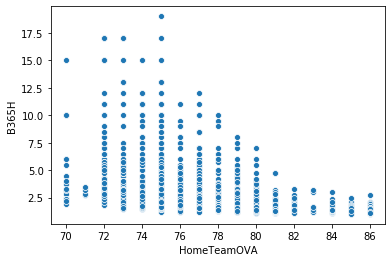

In [105]:
sns.scatterplot(x='HomeTeamOVA',y='B365H',data=df)

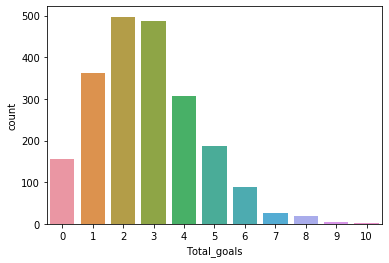

In [106]:
sns.countplot(x='Total_goals', data=df)

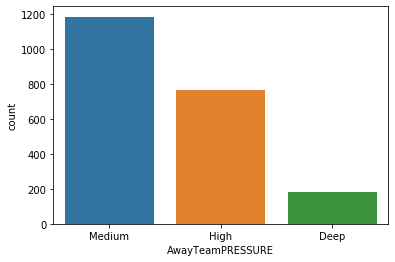

In [107]:
sns.countplot(x='AwayTeamPRESSURE', data=df)

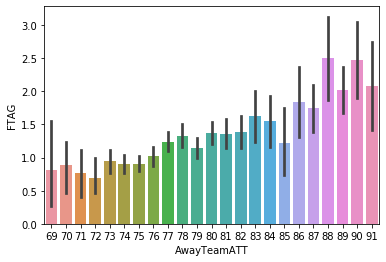

In [108]:
sns.barplot(x='AwayTeamATT', y='FTAG', data=df)

In [109]:
# EMPIEZO SCRIPT CON RED NEURONAL

from sklearn.model_selection import train_test_split

In [202]:
X = df[['HomeTeamOVA','HomeTeamATT','HomeTeamMID','HomeTeamDEF','AwayTeamOVA','AwayTeamATT','AwayTeamMID','AwayTeamDEF']].values
y = df['B365H'].values

In [203]:
import tensorflow as tf

In [204]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=101)

In [206]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='rmsprop',loss = 'mse')

In [207]:
model.fit(x=X_train,y=y_train,epochs=150)

Train on 1066 samples
Epoch 1/150
1066/1066 [==============================] - 1s 1ms/sample - loss: 54.3560
Epoch 2/150
1066/1066 [==============================] - 0s 139us/sample - loss: 5.6633
Epoch 3/150
1066/1066 [==============================] - 0s 138us/sample - loss: 5.1944
Epoch 4/150
1066/1066 [==============================] - 0s 130us/sample - loss: 4.7515
Epoch 5/150
1066/1066 [==============================] - 0s 141us/sample - loss: 4.2591
Epoch 6/150
1066/1066 [==============================] - 0s 129us/sample - loss: 3.7222
Epoch 7/150
1066/1066 [==============================] - 0s 127us/sample - loss: 3.9247
Epoch 8/150
1066/1066 [==============================] - 0s 144us/sample - loss: 3.2191
Epoch 9/150
1066/1066 [==============================] - 0s 134us/sample - loss: 3.2482
Epoch 10/150
1066/1066 [==============================] - 0s 133us/sample - loss: 2.7083
Epoch 11/150
1066/1066 [==============================] - 0s 117us/sample - loss: 2.8299
Epoch 12/

Epoch 93/150
1066/1066 [==============================] - 0s 178us/sample - loss: 1.1750
Epoch 94/150
1066/1066 [==============================] - 0s 183us/sample - loss: 1.1739
Epoch 95/150
1066/1066 [==============================] - 0s 134us/sample - loss: 1.3439
Epoch 96/150
1066/1066 [==============================] - 0s 112us/sample - loss: 1.2669
Epoch 97/150
1066/1066 [==============================] - 0s 137us/sample - loss: 1.2862
Epoch 98/150
1066/1066 [==============================] - 0s 140us/sample - loss: 1.1263
Epoch 99/150
1066/1066 [==============================] - 0s 130us/sample - loss: 1.1993
Epoch 100/150
1066/1066 [==============================] - 0s 135us/sample - loss: 1.3448
Epoch 101/150
1066/1066 [==============================] - 0s 128us/sample - loss: 1.2377
Epoch 102/150
1066/1066 [==============================] - 0s 142us/sample - loss: 1.2366
Epoch 103/150
1066/1066 [==============================] - 0s 125us/sample - loss: 1.2493
Epoch 104/150
106

In [208]:
loss_df=pd.DataFrame(model.history.history)

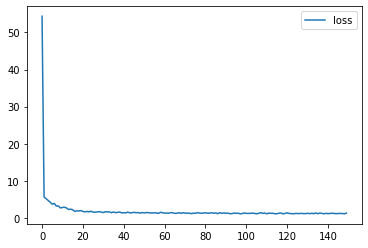

In [209]:
loss_df.plot()

In [210]:
pred_df = pd.DataFrame(y_test,columns=['Test true y'])
test_predictions = model.predict(X_test)

In [211]:
len(pred_df)

1066

In [212]:
len(test_predictions)

1066

In [213]:
test_predictions = pd.Series(test_predictions.reshape(1066))

In [214]:
pred_df_total = pd.concat([pred_df,test_predictions],axis=1)

In [215]:
pred_df_total.columns = ['Test true y','Predicted y']

pred_df_total

,Test true y,Predicted y
0,1.95,1.745402
1,5.75,6.610264
2,5.50,3.712440
3,2.25,1.871099
4,1.14,1.053132
5,3.10,3.292372
6,11.00,6.588506
7,3.60,3.256001
8,1.57,1.439156
9,2.80,2.069710


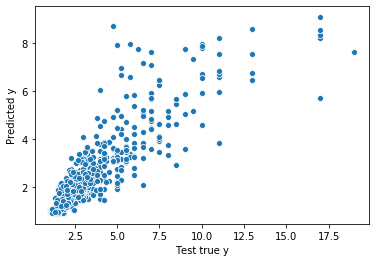

In [216]:
sns.scatterplot(x='Test true y',y='Predicted y',data=pred_df_total)

<function matplotlib.pyplot.show(*args, **kw)>

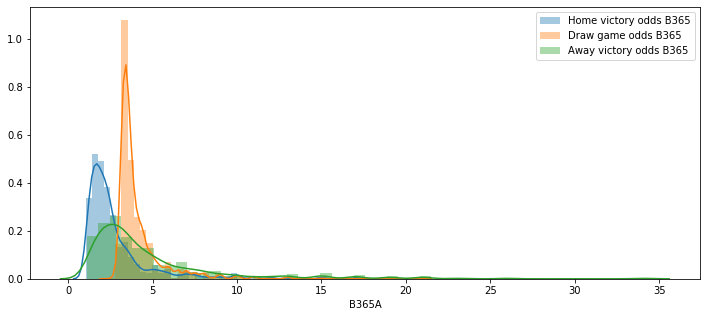

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

sns.distplot(df['B365H'],label='Home victory odds B365')
sns.distplot(df['B365D'],label='Draw game odds B365')
sns.distplot(df['B365A'],label='Away victory odds B365')

#fig.legend(labels=['test_label1','test_label2'])

plt.legend()
plt.show


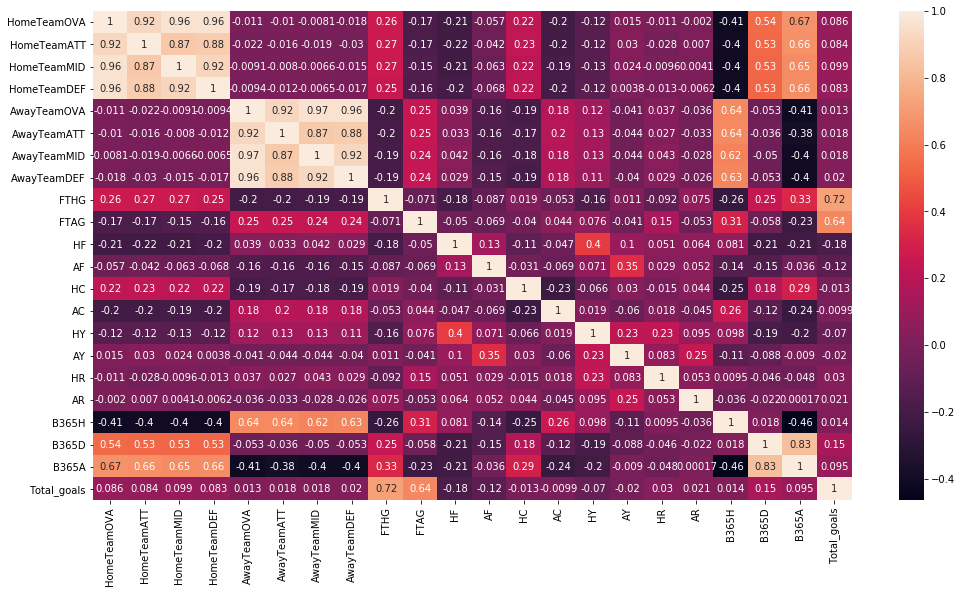

In [126]:
#We try now with a LINEAL REGRESSION instead of the neural network. We start by 
#trying parameters, checking the correlation among the variables

plt.figure(figsize=(17,9))

sns.heatmap(df[['HomeTeamOVA','HomeTeamATT','HomeTeamMID','HomeTeamDEF','HomeTeamHITS','AwayTeamOVA','AwayTeamATT','AwayTeamMID','AwayTeamDEF','AwayTeamHITS','FTHG','FTAG','HF','AF','HC','AC','HY','AY','HR','AR','B365H','B365D','B365A','Total_goals']].corr(method='pearson'),annot=True)

In [127]:
#Info about the variables. Use this script to get the description of 1 variable

data_info = pd.read_csv('/home/miguel/Desktop/Archivos_Miguel/datos_liga/variables.csv',index_col='Variable')
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])
    
feat_info('FTAG')

Full Time Away Team Goals


In [151]:
# Utilizamos mismas x de antes:

X = df[['HomeTeamOVA','HomeTeamATT','HomeTeamMID','HomeTeamDEF','AwayTeamOVA','AwayTeamATT','AwayTeamMID','AwayTeamDEF']].values
y = df['B365H'].values

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

In [217]:
from sklearn.linear_model import LinearRegression

In [218]:
lm = LinearRegression()

In [219]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
lm.coef_

array([-0.03500861, -0.0517916 , -0.05600015, -0.08593946, -0.08461772,
        0.17348814,  0.13992358,  0.1289219 ])

In [221]:
cdf = pd.DataFrame(lm.coef_,['HomeTeamOVA','HomeTeamATT','HomeTeamMID','HomeTeamDEF','AwayTeamOVA','AwayTeamATT','AwayTeamMID','AwayTeamDEF'],columns=['Coeff'])

In [222]:
cdf

,Coeff
HomeTeamOVA,-0.035009
HomeTeamATT,-0.051792
HomeTeamMID,-0.056000
HomeTeamDEF,-0.085939
AwayTeamOVA,-0.084618
AwayTeamATT,0.173488
AwayTeamMID,0.139924
AwayTeamDEF,0.128922


In [223]:
# Predictions

predictions = lm.predict(X_test)

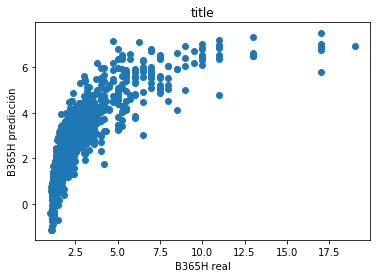

In [224]:
plt.scatter(y_test,predictions)
plt.title("title")
plt.xlabel("B365H real")
plt.ylabel("B365H predicción")
plt.show()